# Análisis de Grafos: Red de Estaciones Personal
### Usuario 668737 - Top 1 con 1,235 viajes en 2024

In [1]:
# Imports y configuración
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import pandas as pd

# Configuración de visualización
plt.style.use('default')
%matplotlib inline

### Función auxiliar para dibujar grafos dirigidos

In [ ]:
def draw_directed_graph(G, title="Grafo Dirigido", node_size=800, with_labels=True, 
                       k=0.5, iterations=50, figsize=(12, 8)):
    """
    Dibuja un grafo dirigido con opciones personalizables
    
    Parameters:
    -----------
    G : networkx.DiGraph
        Grafo dirigido a visualizar
    title : str
        Título del gráfico
    node_size : int or dict
        Tamaño de los nodos (puede ser un diccionario por nodo)
    with_labels : bool
        Si mostrar etiquetas de nodos
    k : float
        Distancia óptima entre nodos (spring_layout)
    iterations : int
        Número de iteraciones para el layout
    """
    plt.figure(figsize=figsize)
    
    # Layout spring con parámetros ajustables
    pos = nx.spring_layout(G, k=k, iterations=iterations, seed=42)
    
    # Dibujar nodos
    nx.draw_networkx_nodes(
        G, pos,
        node_color='lightblue',
        node_size=node_size,
        alpha=0.9,
        edgecolors='black',
        linewidths=1.5
    )
    
    # Dibujar aristas con flechas
    nx.draw_networkx_edges(
        G, pos,
        edge_color='gray',
        arrows=True,
        arrowsize=15,
        arrowstyle='->',
        connectionstyle='arc3,rad=0.1',
        width=1.5,
        alpha=0.6
    )
    
    # Etiquetas de nodos
    if with_labels:
        nx.draw_networkx_labels(
            G, pos,
            font_size=8,
            font_weight='bold',
            font_color='black'
        )
    
    # Mostrar pesos de aristas si existen
    edge_labels = nx.get_edge_attributes(G, 'weight')
    if edge_labels and len(G.edges()) < 50:  # Solo si no hay demasiadas aristas
        nx.draw_networkx_edge_labels(
            G, pos,
            edge_labels=edge_labels,
            font_size=7,
            font_color='red'
        )
    
    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
# Cargar datos del usuario 668737
df = pl.read_csv("data/usuario_668737_viajes.csv")

print(f"Total de viajes cargados: {df.height:,}")
print(f"\nColumnas disponibles:")
print(df.columns)
print(f"\nPrimeras 5 filas:")
print(df.head())

Total de viajes cargados: 1,270

Columnas disponibles:
['id_recorrido', 'duracion_recorrido', 'fecha_origen_recorrido', 'id_estacion_origen', 'nombre_estacion_origen', 'direccion_estacion_origen', 'long_estacion_origen', 'lat_estacion_origen', 'fecha_destino_recorrido', 'id_estacion_destino', 'nombre_estacion_destino', 'direccion_estacion_destino', 'long_estacion_destino', 'lat_estacion_destino', 'id_usuario', 'modelo_bicicleta', 'genero']

Primeras 5 filas:
shape: (5, 17)
┌────────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬────────┐
│ id_recorri ┆ duracion_r ┆ fecha_ori ┆ id_estaci ┆ … ┆ lat_estac ┆ id_usuari ┆ modelo_bi ┆ genero │
│ do         ┆ ecorrido   ┆ gen_recor ┆ on_origen ┆   ┆ ion_desti ┆ o         ┆ cicleta   ┆ ---    │
│ ---        ┆ ---        ┆ rido      ┆ ---       ┆   ┆ no        ┆ ---       ┆ ---       ┆ str    │
│ i64        ┆ i64        ┆ ---       ┆ i64       ┆   ┆ ---       ┆ f64       ┆ str       ┆        │
│            ┆   

### Construcción del Grafo Dirigido Ponderado

In [ ]:
# Crear grafo dirigido
G = nx.DiGraph()

# Agregar aristas con pesos (frecuencia de uso de cada ruta)
for row in df.iter_rows(named=True):
    origen = row['nombre_estacion_origen']
    destino = row['nombre_estacion_destino']
    
    if G.has_edge(origen, destino):
        # Incrementar peso si la arista ya existe
        G[origen][destino]['weight'] += 1
    else:
        # Crear nueva arista con peso 1
        G.add_edge(origen, destino, weight=1)

print("="*60)
print("GRAFO DIRIGIDO PONDERADO - RED DE ESTACIONES")
print("="*60)
print(f"\nNodos (estaciones únicas): {G.number_of_nodes()}")
print(f"Aristas (rutas únicas): {G.number_of_edges()}")
print(f"Total de viajes: {sum(nx.get_edge_attributes(G, 'weight').values())}")

GRAFO DIRIGIDO PONDERADO - RED DE ESTACIONES

Nodos (estaciones únicas): 35
Aristas (rutas únicas): 106
Total de viajes: 1270


### Propiedades básicas del grafo

In [ ]:
# Densidad del grafo
density = nx.density(G)
max_possible_edges = G.number_of_nodes() * (G.number_of_nodes() - 1)

print(f"\nDensidad del grafo: {density:.4f}")
print(f"Aristas posibles (grafo completo): {max_possible_edges}")
print(f"Porcentaje de rutas exploradas: {(G.number_of_edges()/max_possible_edges)*100:.2f}%")

# Verificar si es conexo (débilmente o fuertemente)
is_weakly_connected = nx.is_weakly_connected(G)
is_strongly_connected = nx.is_strongly_connected(G)

print(f"\n¿Es débilmente conexo? {is_weakly_connected}")
print(f"¿Es fuertemente conexo? {is_strongly_connected}")

# Componentes conexas
num_weak_components = nx.number_weakly_connected_components(G)
num_strong_components = nx.number_strongly_connected_components(G)

print(f"\nComponentes débilmente conexas: {num_weak_components}")
print(f"Componentes fuertemente conexas: {num_strong_components}")


Densidad del grafo: 0.0891
Aristas posibles (grafo completo): 1190
Porcentaje de rutas exploradas: 8.91%

¿Es débilmente conexo? False
¿Es fuertemente conexo? False

Componentes débilmente conexas: 2
Componentes fuertemente conexas: 16


### Análisis de Grados (In-degree y Out-degree)

In [ ]:
# Calcular grados de entrada y salida (ponderados)
in_degree = dict(G.in_degree(weight='weight'))
out_degree = dict(G.out_degree(weight='weight'))

# Convertir a DataFrame para análisis
df_degrees = pd.DataFrame({
    'Estacion': list(G.nodes()),
    'Grado_Entrada': [in_degree[n] for n in G.nodes()],
    'Grado_Salida': [out_degree[n] for n in G.nodes()],
})

df_degrees['Grado_Total'] = df_degrees['Grado_Entrada'] + df_degrees['Grado_Salida']
df_degrees['Balance'] = df_degrees['Grado_Salida'] - df_degrees['Grado_Entrada']

# Ordenar por grado total
df_degrees = df_degrees.sort_values('Grado_Total', ascending=False)

print("="*60)
print("ANÁLISIS DE GRADOS (PONDERADOS)")
print("="*60)
print(f"\nGrado promedio de entrada: {np.mean(list(in_degree.values())):.2f}")
print(f"Grado promedio de salida: {np.mean(list(out_degree.values())):.2f}")

print(f"\n{'='*60}")
print("TOP 10 ESTACIONES POR GRADO TOTAL")
print(f"{'='*60}")
print(df_degrees.head(10).to_string(index=False))

ANÁLISIS DE GRADOS (PONDERADOS)

Grado promedio de entrada: 36.29
Grado promedio de salida: 36.29

TOP 10 ESTACIONES POR GRADO TOTAL
                    Estacion  Grado_Entrada  Grado_Salida  Grado_Total  Balance
      146 - Hospital Francés            535           525         1060      -10
                083 - Paraná            477           322          799     -155
         096 - Carlos Gardel            102            57          159      -45
       084 - TEATRO PICADERO              2            94           96       92
              086 - SAAVEDRA             27            66           93       39
199 - ESTADOS UNIDOS Y BOEDO             29            33           62        4
  120 - HOSPITAL RAMOS MEJIA             45            15           60      -30
               045 - Uruguay             19            27           46        8
                  013 - ONCE              3            24           27       21
               163 - ONCE II              0            17          

In [ ]:
# Estaciones principales - Origen vs Destino
print("\n" + "="*60)
print("TOP 5 ESTACIONES DE ORIGEN (Mayor grado de salida)")
print("="*60)
top_salida = df_degrees.nlargest(5, 'Grado_Salida')[['Estacion', 'Grado_Salida']]
print(top_salida.to_string(index=False))

print("\n" + "="*60)
print("TOP 5 ESTACIONES DE DESTINO (Mayor grado de entrada)")
print("="*60)
top_entrada = df_degrees.nlargest(5, 'Grado_Entrada')[['Estacion', 'Grado_Entrada']]
print(top_entrada.to_string(index=False))

# Estaciones desbalanceadas (más usadas para salir o llegar)
print("\n" + "="*60)
print("ESTACIONES MÁS DESBALANCEADAS")
print("="*60)
print("\nMás usadas para SALIR (balance positivo):")
print(df_degrees.nlargest(3, 'Balance')[['Estacion', 'Grado_Salida', 'Grado_Entrada', 'Balance']].to_string(index=False))

print("\nMás usadas para LLEGAR (balance negativo):")
print(df_degrees.nsmallest(3, 'Balance')[['Estacion', 'Grado_Salida', 'Grado_Entrada', 'Balance']].to_string(index=False))


TOP 5 ESTACIONES DE ORIGEN (Mayor grado de salida)
              Estacion  Grado_Salida
146 - Hospital Francés           525
          083 - Paraná           322
 084 - TEATRO PICADERO            94
        086 - SAAVEDRA            66
   096 - Carlos Gardel            57

TOP 5 ESTACIONES DE DESTINO (Mayor grado de entrada)
                    Estacion  Grado_Entrada
      146 - Hospital Francés            535
                083 - Paraná            477
         096 - Carlos Gardel            102
  120 - HOSPITAL RAMOS MEJIA             45
199 - ESTADOS UNIDOS Y BOEDO             29

ESTACIONES MÁS DESBALANCEADAS

Más usadas para SALIR (balance positivo):
             Estacion  Grado_Salida  Grado_Entrada  Balance
084 - TEATRO PICADERO            94              2       92
       086 - SAAVEDRA            66             27       39
           013 - ONCE            24              3       21

Más usadas para LLEGAR (balance negativo):
                  Estacion  Grado_Salida  Grado_En

### Distribución de Grados

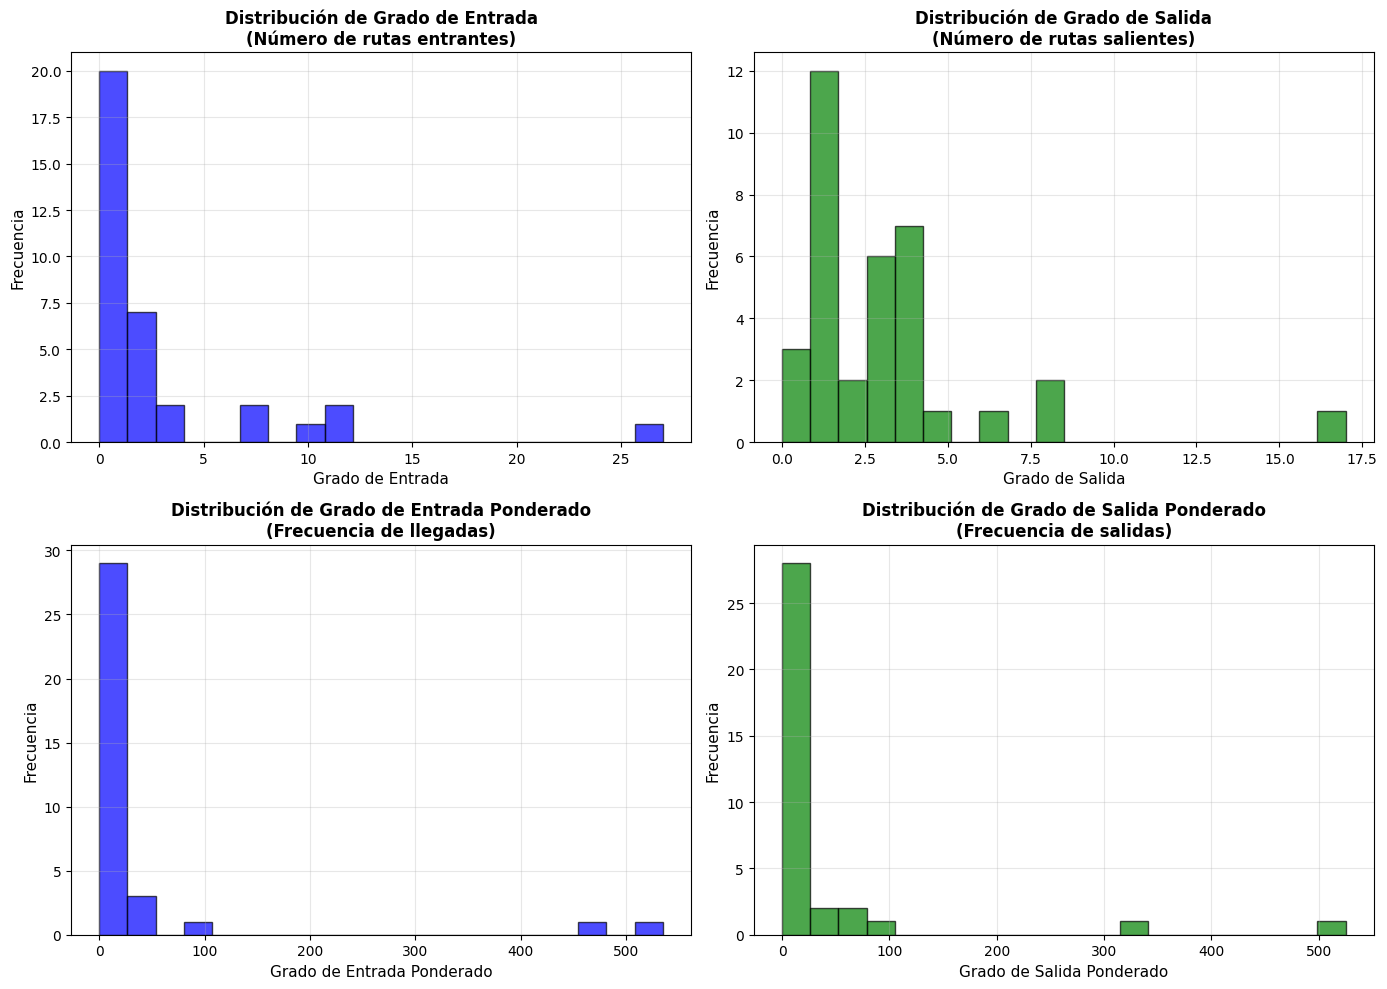

In [ ]:
# Calcular distribución de grados (no ponderados primero)
in_degree_simple = dict(G.in_degree())
out_degree_simple = dict(G.out_degree())

# Histogramas de distribución
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Grado de entrada (simple)
axes[0, 0].hist(list(in_degree_simple.values()), bins=20, color='blue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Grado de Entrada', fontsize=11)
axes[0, 0].set_ylabel('Frecuencia', fontsize=11)
axes[0, 0].set_title('Distribución de Grado de Entrada\n(Número de rutas entrantes)', 
                      fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Grado de salida (simple)
axes[0, 1].hist(list(out_degree_simple.values()), bins=20, color='green', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Grado de Salida', fontsize=11)
axes[0, 1].set_ylabel('Frecuencia', fontsize=11)
axes[0, 1].set_title('Distribución de Grado de Salida\n(Número de rutas salientes)', 
                      fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Grado de entrada (ponderado)
axes[1, 0].hist(list(in_degree.values()), bins=20, color='blue', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Grado de Entrada Ponderado', fontsize=11)
axes[1, 0].set_ylabel('Frecuencia', fontsize=11)
axes[1, 0].set_title('Distribución de Grado de Entrada Ponderado\n(Frecuencia de llegadas)', 
                      fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Grado de salida (ponderado)
axes[1, 1].hist(list(out_degree.values()), bins=20, color='green', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Grado de Salida Ponderado', fontsize=11)
axes[1, 1].set_ylabel('Frecuencia', fontsize=11)
axes[1, 1].set_title('Distribución de Grado de Salida Ponderado\n(Frecuencia de salidas)', 
                      fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Distribución de Grados en escala Log-Log

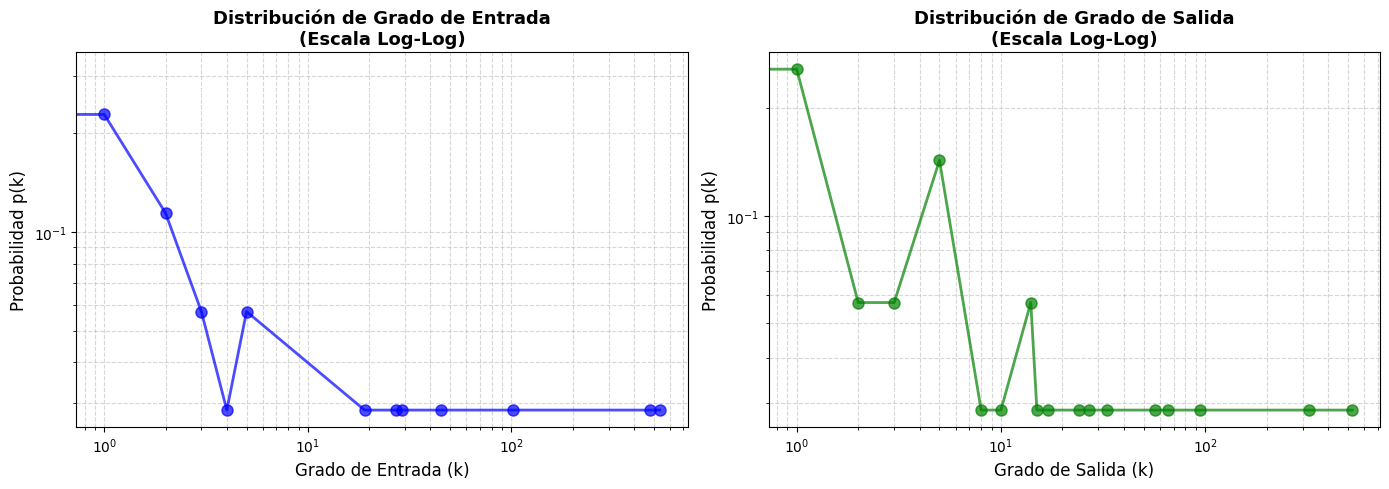

In [ ]:
# Preparar datos para distribución p(k)
def calculate_degree_distribution(degree_dict):
    """Calcula p(k) = N_k / N"""
    N = len(degree_dict)
    degree_counts = {}
    
    for degree in degree_dict.values():
        degree_counts[degree] = degree_counts.get(degree, 0) + 1
    
    k_values = np.array(sorted(degree_counts.keys()))
    p_k_values = np.array([degree_counts[k] / N for k in k_values])
    
    return k_values, p_k_values

# Calcular distribuciones
k_in, p_k_in = calculate_degree_distribution(in_degree)
k_out, p_k_out = calculate_degree_distribution(out_degree)

# Gráfico log-log
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Entrada
axes[0].loglog(k_in, p_k_in, 'bo-', markersize=8, linewidth=2, alpha=0.7)
axes[0].set_xlabel('Grado de Entrada (k)', fontsize=12)
axes[0].set_ylabel('Probabilidad p(k)', fontsize=12)
axes[0].set_title('Distribución de Grado de Entrada\n(Escala Log-Log)', 
                  fontsize=13, fontweight='bold')
axes[0].grid(True, which="both", ls="--", alpha=0.5)

# Salida
axes[1].loglog(k_out, p_k_out, 'go-', markersize=8, linewidth=2, alpha=0.7)
axes[1].set_xlabel('Grado de Salida (k)', fontsize=12)
axes[1].set_ylabel('Probabilidad p(k)', fontsize=12)
axes[1].set_title('Distribución de Grado de Salida\n(Escala Log-Log)', 
                  fontsize=13, fontweight='bold')
axes[1].grid(True, which="both", ls="--", alpha=0.5)

plt.tight_layout()
plt.show()

### Componentes Fuertemente Conexas

In [ ]:
# Obtener componentes fuertemente conexas
strong_components = list(nx.strongly_connected_components(G))

print("="*60)
print("COMPONENTES FUERTEMENTE CONEXAS")
print("="*60)
print(f"\nTotal: {len(strong_components)}")

# Ordenar por tamaño
strong_components_sorted = sorted(strong_components, key=len, reverse=True)

print(f"\nComponente más grande: {len(strong_components_sorted[0])} estaciones")

# Mostrar las primeras 5 componentes
for i, component in enumerate(strong_components_sorted[:5], 1):
    print(f"\nComponente {i}: {len(component)} estaciones")
    if len(component) <= 10:
        print(f"  Estaciones: {list(component)}")
    else:
        print(f"  Primeras 5: {list(component)[:5]}")

COMPONENTES FUERTEMENTE CONEXAS

Total: 16

Componente más grande: 20 estaciones

Componente 1: 20 estaciones
  Primeras 5: ['146 - Hospital Francés', '178 - José Marmol', '083 - Paraná', '086 - SAAVEDRA', '118 - MEXICO']

Componente 2: 1 estaciones
  Estaciones: ['161 - Humahuaca']

Componente 3: 1 estaciones
  Estaciones: ['132 - CORRIENTES']

Componente 4: 1 estaciones
  Estaciones: ['107 - HOSPITAL GARRAHAN']

Componente 5: 1 estaciones
  Estaciones: ['163 - ONCE II']


### Visualización del Grafo Completo

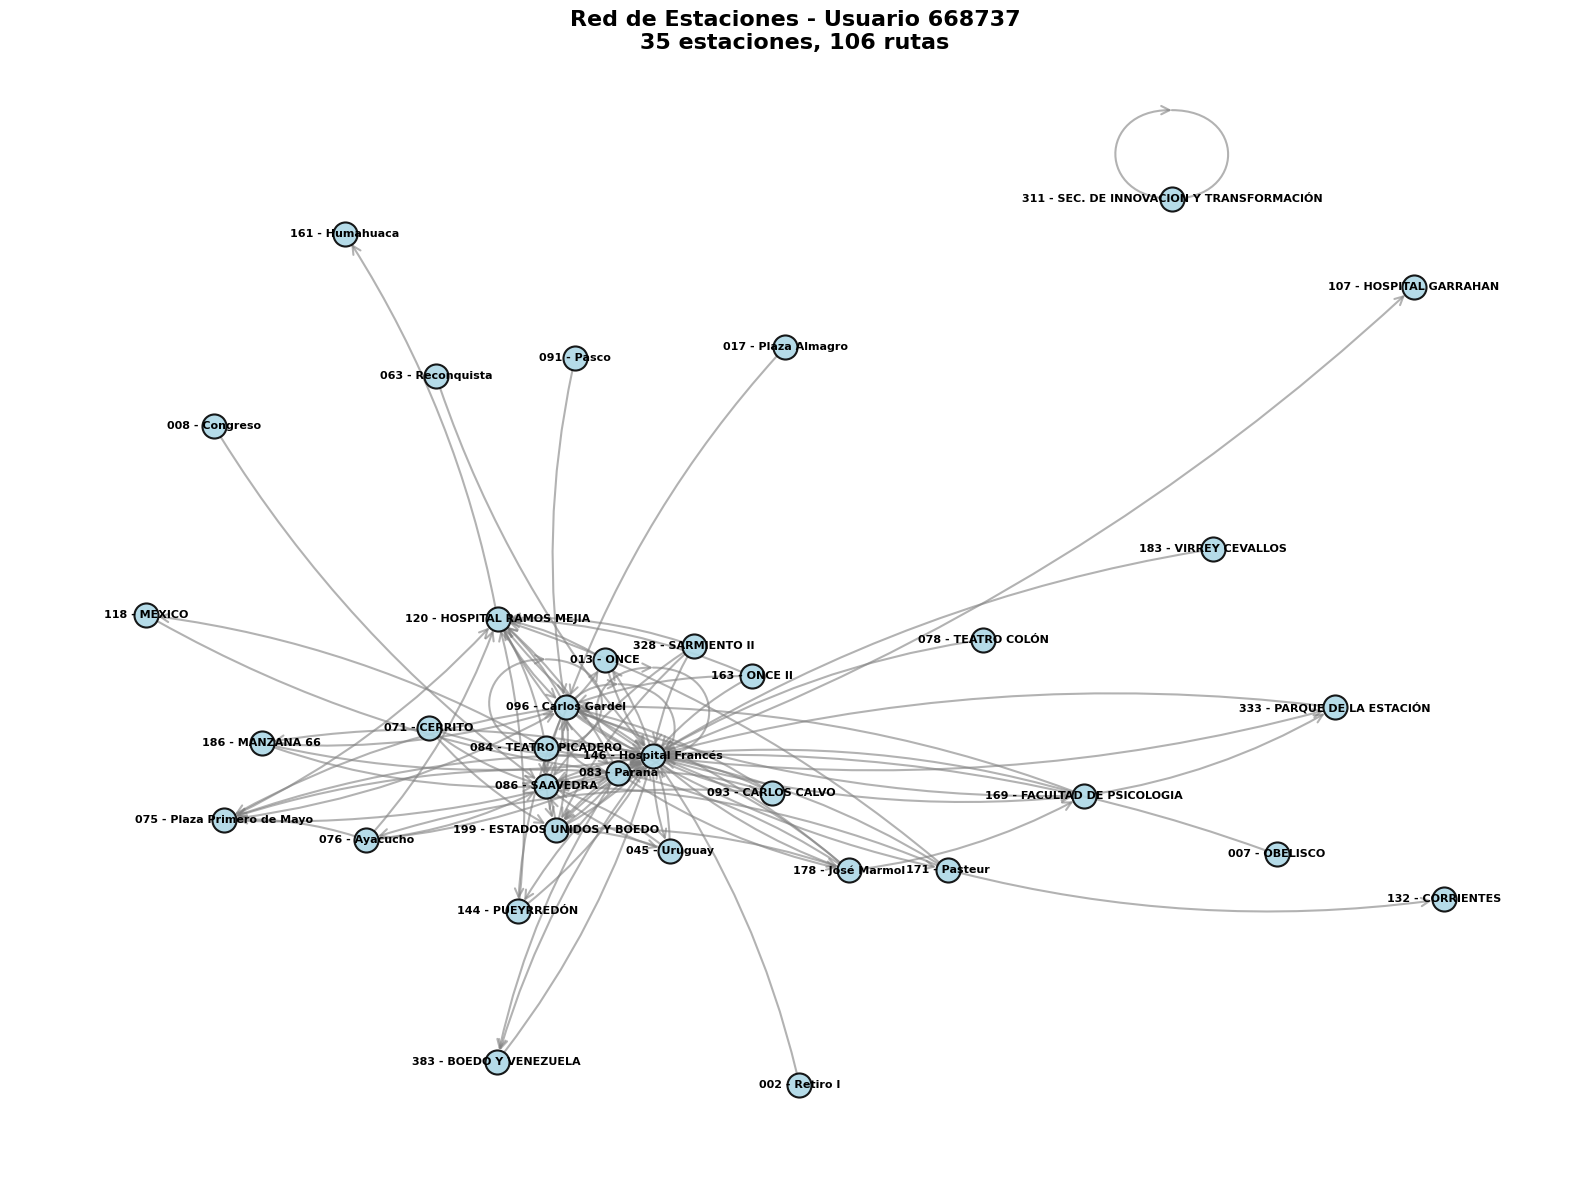

In [ ]:
# Visualizar el grafo completo (si no es muy grande)
if G.number_of_nodes() <= 50:
    draw_directed_graph(
        G, 
        title=f"Red de Estaciones - Usuario 668737\n{G.number_of_nodes()} estaciones, {G.number_of_edges()} rutas",
        node_size=300,
        with_labels=True,
        k=1.5,
        iterations=100,
        figsize=(16, 12)
    )
else:
    print(f"El grafo tiene {G.number_of_nodes()} nodos. Se recomienda visualizar subgrafos.")
    print("Ver celdas siguientes para visualizaciones parciales.")

### Visualización del Subgrafo TOP (rutas más frecuentes)

Subgrafo con rutas usadas ≥ 5 veces:
  Nodos: 14
  Aristas: 25


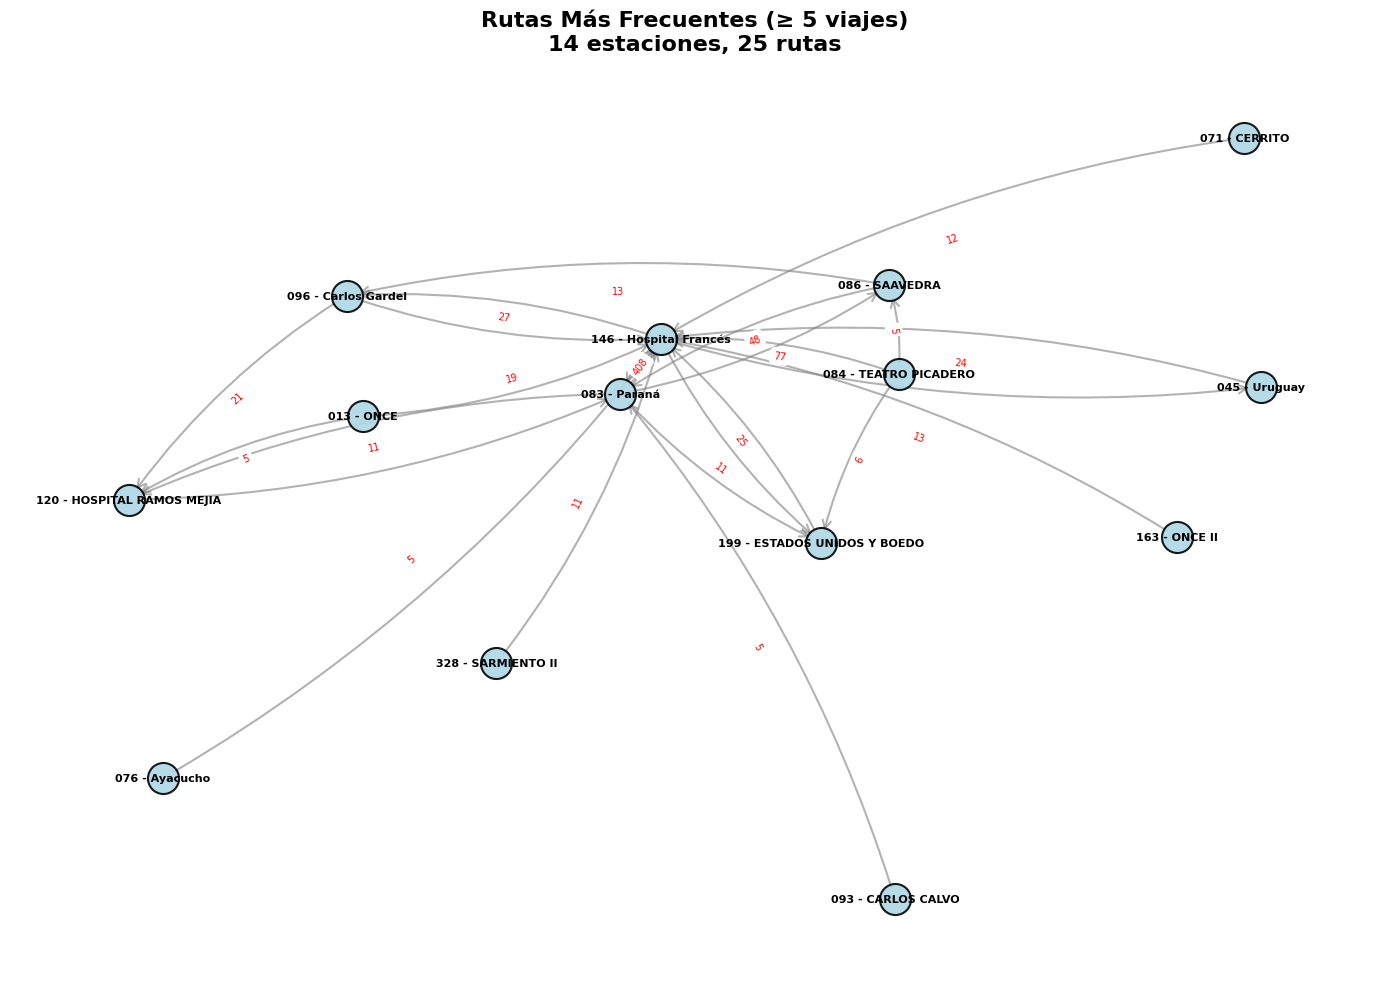

In [ ]:
# Crear subgrafo solo con las rutas más frecuentes
# Filtrar aristas con peso >= umbral
umbral_peso = 5  # Ajustar según necesidad

edges_top = [(u, v, d) for u, v, d in G.edges(data=True) if d['weight'] >= umbral_peso]
G_top = nx.DiGraph()
G_top.add_edges_from([(u, v, d) for u, v, d in edges_top])

print(f"Subgrafo con rutas usadas ≥ {umbral_peso} veces:")
print(f"  Nodos: {G_top.number_of_nodes()}")
print(f"  Aristas: {G_top.number_of_edges()}")

# Visualizar
draw_directed_graph(
    G_top,
    title=f"Rutas Más Frecuentes (≥ {umbral_peso} viajes)\n{G_top.number_of_nodes()} estaciones, {G_top.number_of_edges()} rutas",
    node_size=500,
    with_labels=True,
    k=2,
    iterations=100,
    figsize=(14, 10)
)

### Visualización con tamaño proporcional al grado

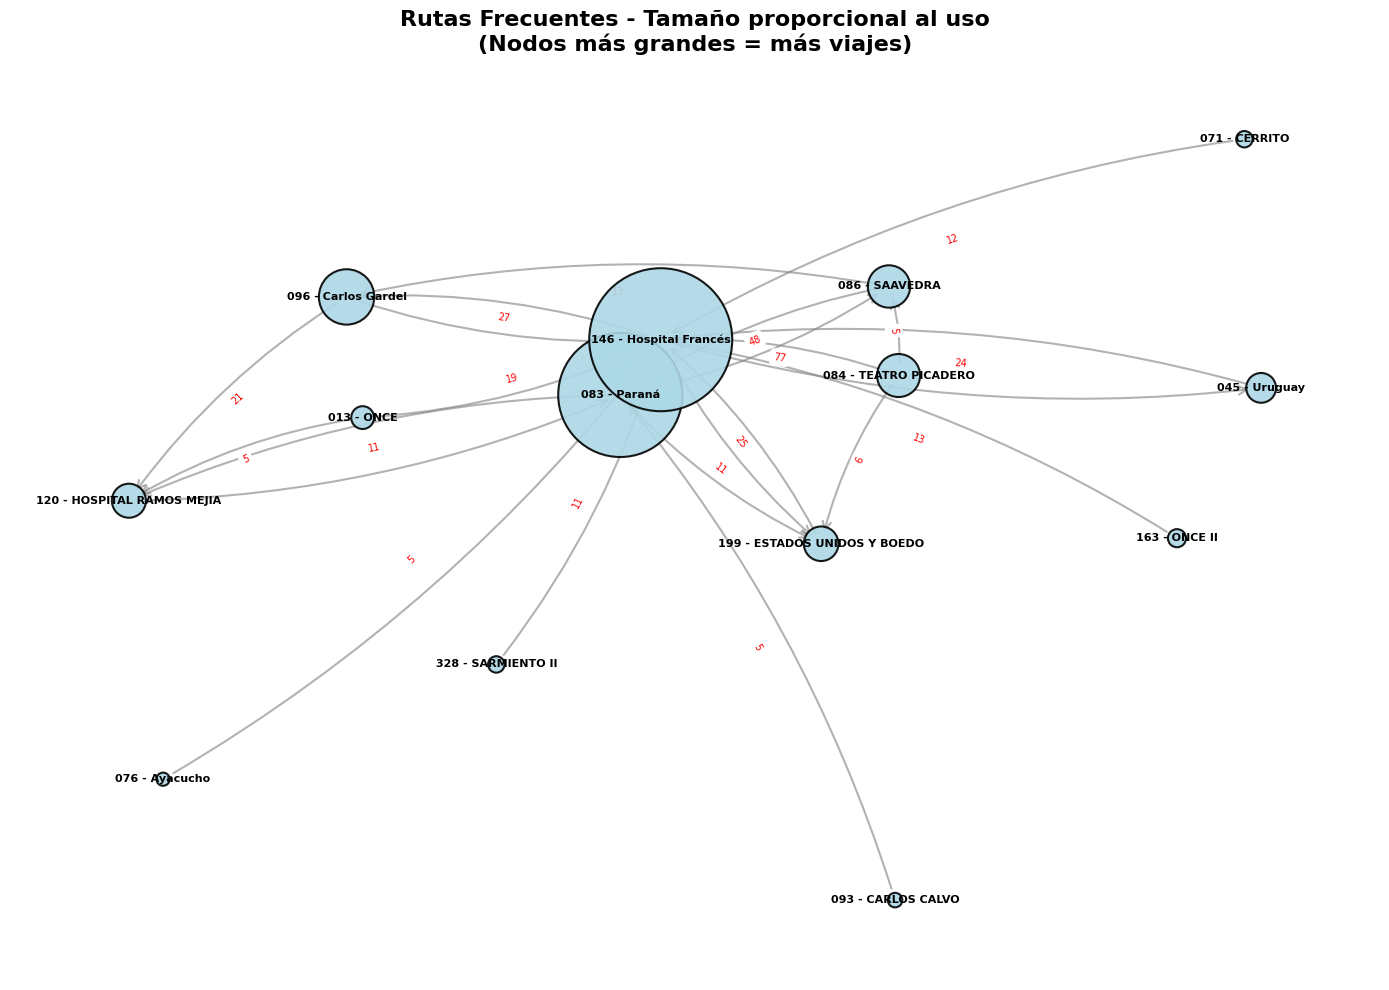

In [ ]:
# Crear diccionario de tamaños basado en grado total
node_sizes = {}
for node in G.nodes():
    total_degree = in_degree[node] + out_degree[node]
    node_sizes[node] = total_degree * 10  # Escalar para visualización

# Visualizar subgrafo top con tamaños variables
if G_top.number_of_nodes() > 0:
    node_sizes_top = [node_sizes.get(node, 100) for node in G_top.nodes()]
    
    draw_directed_graph(
        G_top,
        title=f"Rutas Frecuentes - Tamaño proporcional al uso\n(Nodos más grandes = más viajes)",
        node_size=node_sizes_top,
        with_labels=True,
        k=2,
        iterations=100,
        figsize=(14, 10)
    )

In [ ]:
# Resumen Final y Conclusiones
print("="*60)
print("RESUMEN DEL ANÁLISIS - USUARIO 668737")
print("="*60)

print(f"\nESTADÍSTICAS GENERALES:")
print(f"   • Total de viajes: {df.height:,}")
print(f"   • Estaciones visitadas: {G.number_of_nodes()}")
print(f"   • Rutas únicas utilizadas: {G.number_of_edges()}")
print(f"   • Densidad del grafo: {density:.4f} ({(density*100):.2f}%)")
print(f"   • Rutas exploradas: {(G.number_of_edges()/max_possible_edges)*100:.2f}% del total posible")

print(f"\nCONECTIVIDAD:")
print(f"   • Débilmente conexo: {'Sí' if is_weakly_connected else 'No'}")
print(f"   • Fuertemente conexo: {'Sí' if is_strongly_connected else 'No'}")
print(f"   • Componentes débiles: {num_weak_components}")
print(f"   • Componentes fuertes: {num_strong_components}")

print(f"\nGRADOS PROMEDIO:")
print(f"   • Grado de entrada promedio: {np.mean(list(in_degree.values())):.2f}")
print(f"   • Grado de salida promedio: {np.mean(list(out_degree.values())):.2f}")

print(f"\nESTACIÓN MÁS IMPORTANTE:")
top_station = df_degrees.iloc[0]
print(f"   • Nombre: {top_station['Estacion']}")
print(f"   • Viajes de salida: {int(top_station['Grado_Salida'])}")
print(f"   • Viajes de llegada: {int(top_station['Grado_Entrada'])}")
print(f"   • Total: {int(top_station['Grado_Total'])}")

print("\n" + "="*60)

RESUMEN DEL ANÁLISIS - USUARIO 668737

ESTADÍSTICAS GENERALES:
   • Total de viajes: 1,270
   • Estaciones visitadas: 35
   • Rutas únicas utilizadas: 106
   • Densidad del grafo: 0.0891 (8.91%)
   • Rutas exploradas: 8.91% del total posible

CONECTIVIDAD:
   • Débilmente conexo: No
   • Fuertemente conexo: No
   • Componentes débiles: 2
   • Componentes fuertes: 16

GRADOS PROMEDIO:
   • Grado de entrada promedio: 36.29
   • Grado de salida promedio: 36.29

ESTACIÓN MÁS IMPORTANTE:
   • Nombre: 146 - Hospital Francés
   • Viajes de salida: 525
   • Viajes de llegada: 535
   • Total: 1060

